## Tracing Fan Uptake:<br/>Computational Text Analysis of "The Legend of Korra" Fanfictions from Archive Of Our Own

Cara Marta Messina<br/>
PhD Candidate in English, Writing & Rhetoric<br/>
Northeastern University<br/>
Published for <em>The Journal of Writing Analytics</em>, Volume 3 and [The Critical Fan Toolkit](http://www.criticalfantoolkit.org/home).

This computational notebook demonstrates the data preparation steps for the article "Tracing Fan Uptakes: Relationship Tagging Practices in The Legend of Korra Fanfictions," which has been accepted and will be published soon in the <em>The Journal of Writing Analytics</em>.

This notebook will go over:
- uploading the csv file created using Jingyi Li and Sarah Sterman's <em>Archive of Our Own</em> Python scraper (available at https://github.com/radiolarian/AO3Scraper)
- adding in the 'month' column
- basic visualizations

In [41]:
#pandas for working with dataframes
import pandas as pd

#regular expression library
import re

#numpy specifically works with numbers
import numpy as np

#matplot library creates visualizations
import matplotlib.pyplot as plt
%matplotlib inline

#for making a string of elements separated by commas into a list
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktLanguageVars 

#has the nice counter feature for counting tags
import collections
from collections import Counter 

In [2]:
#I am not saving the data in this GitHub folder
allkorra = pd.read_csv('../../../data/korra/korra2018/allkorra.csv')

#providing a preview of the data. 
allkorra.head(1)

,Unnamed: 0,work_id,title,rating,category,fandom,relationship,character,additional tags,language,...,status,status date,words,chapters,comments,kudos,bookmarks,hits,body,month
0,0,6388009,A More Perfect Union,General Audiences,Gen,Avatar: Legend of Korra,NaN,"Noatak (Avatar), Tarrlok (Avatar), Amon (Avatar)",Alternate Universe,English,...,Updated,2018-03-14,8139,4/?,11,27,4,286,He's forgotten how to be warm. The thought wou...,2016-03


## Create a "Month" Column

First, I will create a "month" column using the above dataset (the dataset already has a "month" column because I did this previously). I use a regular expression to first replace all the empty columns in the body column, then I use another regular expression to take the published dates and use them to create the months data.

In [3]:
allkorra['body'] = allkorra['body'].replace(np.nan,'',regex=True) 
#because some of the "body" values are blank, this will replace them with empty strings

allkorra['body'] = (allkorra['body'] + ' ')
#add space at the end so when I concatinate the body it works

allkorra['body'] = allkorra['body'].replace('\r',' ',regex=True)
#removing the the "empty" body columns

In [4]:
#using a regular expression to create a "month" column
allkorra['month'] = allkorra['published'].replace('(\d{4})(\-)(\d{2})(\-)(\d{2})','\g<1>\g<2>\g<3>', regex=True)

#to show what the new month columns look like
print(allkorra['month'].head(10))

0    2016-03
1    2018-03
2    2018-02
3    2018-03
4    2015-02
5    2017-10
6    2018-03
7    2017-12
8    2017-08
9    2018-03
Name: month, dtype: object


2015-01    400
2014-12    359
2015-02    311
2015-03    236
2014-10    225
2015-06    221
2015-08    201
2015-04    201
2015-05    197
2012-06    197
Name: month, dtype: int64


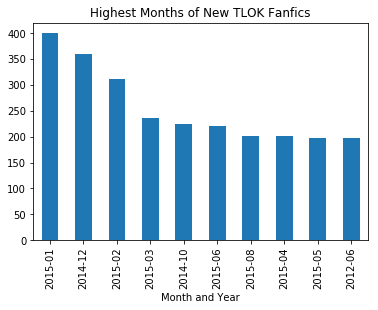

In [5]:
#creating a visualization of the most popular published months

monthcount = allkorra['month'].value_counts().head(10)
print(monthcount)

monthCountGraph = monthcount.plot.bar()
monthCountGraph = plt.title('Highest Months of New TLOK Fanfics')
monthCountGraph = plt.xlabel('Month and Year')
monthCountGraph = plt.xlabel('Month and Year')

## Couting Relationship Tags

This next section will take the dataframe & group it by the 'month' column. Then I have created a function that will take the relationship tags (which are phrased as characterA/characterB, characterA/characterB, etc in the data) and count the most common relationships to then output it as the most common relationship tags used. 

In [36]:
#because some of the "body" values are blank, this will replace them with empty strings
allkorra['body'] = allkorra['body'].replace(np.nan,'',regex=True) 
allkorra['rating'] = allkorra['rating'].replace(np.nan,'',regex=True) 
allkorra['relationship'] = allkorra['relationship'].replace(np.nan,'',regex=True) 
allkorra['additional tags'] = allkorra['additional tags'].replace(np.nan,'',regex=True) 


#add space at the end of important metadata so when I concatinate the body it works
allkorra['body'] = (allkorra['body'] + ' ')
allkorra['rating'] = (allkorra['rating'] + ',')
allkorra['relationship'] = (allkorra['relationship'] + ',')
allkorra['additional tags'] = (allkorra['additional tags'] + ',')

#finally, group by month
month_group = allkorra.groupby('month').apply(lambda x: x.sum())
month_group.head(10)

month                   
2011-02  Unnamed: 0                                                      7485
         work_id                                                       165877
         title                                        Kato of the Fire Nation
         rating                                                    Not Rated,
         category                                                       Multi
         fandom             Avatar: The Last Airbender, Avatar: Legend of ...
         relationship       Mai/Zuko (Avatar), Sokka/Suki (Avatar), Aang (...
         character          Zuko (Avatar), Mai (Avatar), Sokka (Avatar), S...
         additional tags                      Original Characters - Freeform,
         language                                                     English
dtype: object

In [66]:
def TagsAnalyzer(month, metadata):
    '''
    input: the index month+year, such as '2012-04', and the specific metadata, such as 'additional tags'
    output: a tupple of the count of tags in a specific month/year
    
    load in the proper data into a string'''
    tags = month_group.loc[month, metadata]
    
    #clean the string, particularly for the Romance tags that are super messy otherwise
    tags_clean1 = re.sub(r'(,)([A-z])',r'\1 \2',tags)
    tags_clean2 = re.sub(r'(,)([^ ]+)',r'\1',tags_clean1)
    
    #the function to tokenize, or put each value as an element in a list
    class CommaPoint(PunktLanguageVars):
        sent_end_chars = (',') 
    tokenizer = PunktSentenceTokenizer(lang_vars = CommaPoint())
    
    #making "test" from a string to a list
    ListOfTags = tokenizer.tokenize(tags_clean2)
    
    #the "Counter" function is from the collections library
    allCounter=collections.Counter(ListOfTags)
    
    return allCounter.most_common(30)

## Around Mako and Korra's First Kiss

In [77]:
april2012R = TagsAnalyzer('2012-04','relationship')
may2012R = TagsAnalyzer('2012-05','relationship')
june2012R = TagsAnalyzer('2012-06','relationship')

In [78]:
april2012R

[('Korra/Mako (Avatar),', 29),
 ('Bolin/Jinora,', 7),
 ('Korra & Tenzin (Avatar),', 4),
 ('Aang/Katara (Avatar),', 3),
 ('Korra/Asami,', 3),
 ('Bolin/Korra (Avatar),', 3),
 ('Bolin/Korra/Mako (Avatar),', 3),
 ('Bolin & Mako (Avatar),', 2),
 ('Pema/Tenzin (Avatar),', 2),
 ('Korra/Asami Sato,', 2),
 ('Korra/Lin,', 2),
 (',', 1),
 ('John Egbert/Karkat Vantas,', 1),
 ('Sollux Captor/Jade Harley,', 1),
 ('Korra & Bolin,', 1),
 ('Toph Bei Fong/Iroh,', 1),
 ('Kozin,', 1),
 ('Korra and Senna (Avatar),', 1),
 ('Korra and Tonraq (Avatar),', 1),
 ('Korra and parents,', 1),
 ('Mako/Asami,', 1),
 ('Asami Sato/Mako,', 1),
 ('Mako/Asami Sato,', 1),
 ('Azula/Toph Bei Fong,', 1),
 ('Mako/Scarfy,', 1),
 ('Katara/Zuko (Avatar),', 1),
 ('Mai/Zuko (Avatar),', 1),
 ('Asami Sato/Amon,', 1),
 ('Bolin/Mako,', 1),
 ('Minor or Background Relationship(s),', 1)]

In [79]:
may2012R

[('Tahno/Korra,', 29),
 ('Korra/Mako (Avatar),', 27),
 ('Bolin/Korra/Mako (Avatar),', 7),
 ('Bolin/Korra,', 4),
 ('Bolin/Mako,', 4),
 ('Korra/Asami Sato,', 3),
 ('Mako/Asami,', 3),
 ('Korra/Tahno,', 3),
 ('Korra/Lin Beifong,', 3),
 ('Korra/Tahno (Avatar),', 3),
 ('Pema/Tenzin (Avatar),', 3),
 ('Tenzin/Lin Bei Fong,', 3),
 ('Korra/Lin Bei Fong,', 2),
 ('Senna/Tonraq,', 2),
 ('Korra/Asami,', 2),
 ('Tahorra,', 2),
 ('Asami/Mako,', 2),
 ('Mako/Asami Sato,', 2),
 ('Bolin/Korra (Avatar),', 2),
 ('Blaine Anderson/Kurt Hummel,', 1),
 ('Lin Bei Fong &; Bolin,', 1),
 ('Mako/Original Female Character,', 1),
 ('Bolin & Mako (Avatar),', 1),
 ('Mako/Korra,', 1),
 ('Bolin/Asami Sato,', 1),
 ('Tahno/Mako,', 1),
 ('Lin Bei Fong & Korra,', 1),
 ('Korra.Mako,', 1),
 ('Korra/Tarrlok (Avatar),', 1),
 ('light Tahorra,', 1)]

In [80]:
june2012R

[('Korra/Mako (Avatar),', 21),
 ('Mako/Asami,', 6),
 ('Pema/Tenzin (Avatar),', 6),
 ('Korra/Asami,', 5),
 ('Lin/Tenzin,', 5),
 ('Amon/Lieutenant (Avatar),', 5),
 ('Bolin/Korra (Avatar),', 5),
 ('Korra/Lin Beifong,', 4),
 ('Amon/Lieutenant,', 4),
 ('Jinora/Skoochy,', 3),
 ('Iroh II/Bolin,', 3),
 ('Asami Sato/Korra,', 3),
 ('Tahno/Korra,', 3),
 ('Toph Bei Fong/Sokka (Avatar),', 3),
 ('Bolin/Korra,', 3),
 ('Korra/Asami Sato,', 3),
 ('Korra/Tahno,', 3),
 ('Lin Bei Fong/Tenzin,', 2),
 ('Asami Sato/Mako,', 2),
 ('masami (Legend of Korra),', 2),
 ('Mako/Korra,', 2),
 ('Iroh/Asami,', 2),
 ('Aang/Katara (Avatar),', 2),
 ('Amon/Korra,', 2),
 ('Amon/Tahno,', 2),
 ('Lin Beifong/Tenzin,', 2),
 ('Korra/Tahno (Avatar),', 2),
 ('Hiroshi Sato/Lieutenant,', 2),
 ('Friendship - Relationship,', 2),
 ('Asami/Mako,', 2)]

### Hints of Korra and Asami's Budding Relationship

In [81]:
aug20142R = TagsAnalyzer('2014-08','relationship')
sep2014R = TagsAnalyzer('2014-09','relationship')
oct2014R = TagsAnalyzer('2014-10','relationship')

In [82]:
aug20142R

[('Korra/Asami Sato,', 19),
 ('Korra/Mako (Avatar),', 11),
 ('Korra/Tahno (Avatar),', 3),
 ('Jinora/Kai,', 3),
 ('Amon/Lieutenant (Avatar),', 3),
 ('Bolin/Kai,', 2),
 ('Kainora,', 2),
 ('Lin Bei Fong/Korra,', 2),
 ('Ming/Shaozu/Tahno (Avatar),', 2),
 ('Bolin/Korra (Avatar),', 2),
 ('Aang/Katara (Avatar),', 2),
 ('Toph Bei Fong/Sokka (Avatar),', 2),
 ('Varrick/Zhu Li Moon,', 1),
 ('OC - Relationship,', 1),
 ('Avatar - Relationship,', 1),
 ('Adventure - Relationship,', 1),
 ('a bit of past makorra,', 1),
 ('possible future makorra,', 1),
 ('one-sided makorra,', 1),
 ('irrosami,', 1),
 ('Bolin & Kai,', 1),
 ('Kai/Bolin,', 1),
 ('Kai & Bolin,', 1),
 ('kaixbolin,', 1),
 ('bolinxkai - Relationship,', 1),
 ('Lin Bei Fong/Tenzin,', 1),
 ("don't worry he's older,", 1),
 ('Korrasami,', 1),
 ('Korra & Asami Sato,', 1),
 ('Varrick & Zhu Li Moon,', 1)]

In [83]:
sep2014R

[('Korra/Asami Sato,', 54),
 ('Korra/Mako (Avatar),', 12),
 ('Amon/Korra (Avatar),', 7),
 ('Amon | Noatak/Korra,', 7),
 ('Lin Bei Fong/Tenzin,', 6),
 ('Lin Bei Fong/Kya II,', 3),
 ('Aang/Katara (Avatar),', 2),
 ('Pema/Tenzin (Avatar),', 2),
 ('Mako/Asami Sato,', 2),
 ('Korrasami,', 2),
 ('Lin Bei Fong & Tenzin,', 2),
 ('Toph Bei Fong/Sokka (Avatar),', 1),
 ('Noatak/Tarrlok (Avatar),', 1),
 ('Amon | Noatak/Tarrlok,', 1),
 ('Noatak & Tarrlok,', 1),
 ("Yakone/Yakone's Wife,", 1),
 ('OC/Amon,', 1),
 ('Ming-Hua/Ghazan,', 1),
 ("P'li/Zaheer,", 1),
 ('Masami - Relationship,', 1),
 ('Bolin/Asami Sato,', 1),
 ('Ghazan/Ming Hua,', 1),
 ('Lin Bei Fong/Aiwei,', 1),
 ('Varrick/Zhu Li,', 1),
 ('Shady Shin/Original Female Character(s),', 1),
 ('Toph/Awesomeness,', 1),
 ('Toph/OMC,', 1),
 ('Mai/Zuko (Avatar),', 1),
 ('Senna/Tonraq (Avatar),', 1),
 ('Aerith Gainsborough/Cloud Strife,', 1)]

In [84]:
oct2014R

[('Korra/Asami Sato,', 117),
 ('Mako/Prince Wu,', 15),
 ('Mako/Wu (Avatar),', 9),
 ('Korra/Mako (Avatar),', 8),
 ('Wuko - Relationship,', 7),
 ('Amon/Korra (Avatar),', 6),
 ('Amon | Noatak/Korra,', 4),
 ('Pema/Tenzin (Avatar),', 3),
 ('Suyin Beifong/Kuvira,', 3),
 ('Mako/Asami Sato,', 3),
 ('Korrasami,', 3),
 ('Katara/Zuko (Avatar),', 2),
 ('Bolin/Opal,', 2),
 ('Bolin & Mako (Avatar),', 2),
 ('Korra/Tahno (Avatar),', 2),
 ('Lin Bei Fong/Kya II,', 2),
 ('Aang/Katara (Avatar),', 2),
 ("Zaheer/P'li,", 2),
 ('Amon/Lieutenant (Avatar),', 2),
 ('Zutara - Relationship,', 1),
 ('Kya II/Original Character,', 1),
 ('Iroh II/Original Character,', 1),
 ('Tyler Oakley/Troye Sivan,', 1),
 ('Derek Hale/Stiles Stilinski,', 1),
 ('Hazel Grace Lancaster/Augustus Waters,', 1),
 ('Merlin/Arthur Pendragon,', 1),
 ('Elena Gilbert/Damon Salvatore,', 1),
 ('Kickthestickz - Relationship,', 1),
 ('Jack Harkness & Ianto Jones,', 1),
 ('Erik Lehnsherr/Charles Xavier,', 1)]

### Korrasami Confirmed Canon


In [73]:
nov20142R = TagsAnalyzer('2014-11','relationship')
dec2014R = TagsAnalyzer('2014-12','relationship')
jan2015R = TagsAnalyzer('2015-01','relationship')

In [74]:
nov20142R

[('Korra/Asami Sato,', 62),
 ('Varrick/Zhu Li,', 16),
 ('Korra/Mako (Avatar),', 9),
 ('Bolin/Iroh II (Avatar),', 5),
 ('Korra/Kuvira,', 5),
 ('Suyin Beifong/Kuvira,', 3),
 ('Aang/Katara (Avatar),', 3),
 ('Lin Bei Fong/Tenzin,', 3),
 ('Mako/Prince Wu,', 3),
 ('Broh - Relationship,', 3),
 ('Lin Bei Fong/Korra,', 2),
 ('Korra & Asami Sato,', 2),
 ('Mako/Asami Sato,', 2),
 ('Bolin/Original Female Character,', 2),
 ('past korra/mako,', 2),
 ('Bolin & Mako (Avatar),', 2),
 ('Zhurrick - Relationship,', 2),
 ('Amon/Korra (Avatar),', 2),
 ('Kuvira/Suyin Beifong,', 2),
 ('Kuvira/Lin Beifong,', 2),
 ('One-Sided - Relationship,', 2),
 ('Kaiou Michiru/Tenoh Haruka,', 1),
 ('Meiou Setsuna/Tomoe Hotaru,', 1),
 ('Chiba Mamoru/Tsukino Usagi,', 1),
 ('Aino Minako/Hino Rei,', 1),
 ('Kino Makoto/Mizuno Ami,', 1),
 ('Kunzite/Zoisite,', 1),
 ('Jadeite/Nephrite,', 1),
 ('Rule 63 Korra/Opal,', 1),
 ('Korro/Opal,', 1)]

In [75]:
dec2014R

[('Korra/Asami Sato,', 217),
 ('Korra/Mako (Avatar),', 22),
 ('Bolin/Opal,', 13),
 ('Varrick/Zhu Li,', 13),
 ('Jinora/Kai,', 10),
 ('Korrasami,', 8),
 ('Korra/Kuvira,', 7),
 ('Korra & Asami Sato,', 7),
 ('Lin Bei Fong/Tenzin,', 6),
 ('Makorra - Relationship,', 6),
 ('Suyin Beifong/Kuvira,', 5),
 ('Mako/Prince Wu,', 5),
 ('Pema/Tenzin (Avatar),', 5),
 ('Mako/Asami Sato,', 4),
 ('Lin Bei Fong/Kya II,', 4),
 ('Mako/Wu,', 4),
 ('Kuvira/Lin Beifong,', 4),
 ('Mako and Korra,', 4),
 ('Azula/Ty Lee (Avatar),', 3),
 ('Bolin/Wei Beifong,', 3),
 ('Lin Bei Fong & Toph Bei Fong,', 3),
 ('Kai/Jinora,', 3),
 ('Korra/Tarrlok (Avatar),', 3),
 ('Korra & Tonraq (Avatar),', 2),
 ('Senna/Tonraq (Avatar),', 2),
 ('Bopal,', 2),
 ('Bolin/Iroh II (Avatar),', 2),
 ('Korra - Relationship,', 2),
 ('Baatar Jr./Kuvira,', 2),
 ('Weilin,', 2)]

In [76]:
jan2015R

[('Korra/Asami Sato,', 230),
 ('Korra/Mako (Avatar),', 22),
 ('Baatar Jr./Kuvira (Avatar),', 16),
 ('Korrasami,', 15),
 ('Aang/Katara (Avatar),', 12),
 ('Korra/Kuvira,', 12),
 ('Bolin/Opal (Avatar),', 11),
 ('Lin Bei Fong & Toph Bei Fong,', 10),
 ('Bolin/Opal,', 9),
 ('Varrick/Zhu Li,', 9),
 ('korvira - Relationship,', 8),
 ('kuvorra,', 7),
 ('Ambiguous or Implied Relationship(s),', 7),
 ('Korra & Asami Sato,', 5),
 ('Kovira,', 5),
 ('Bolin/Iroh II (Avatar),', 4),
 ('Kuvira/Korra,', 4),
 ('Baatar Jr./Kuvira,', 4),
 ('Lin Bei Fong/Tenzin,', 3),
 ('Jinora/Kai (Avatar),', 3),
 ('Makorra - Relationship,', 3),
 ('Mako/Prince Wu (Avatar),', 3),
 ('Lin Bei Fong/Kya II,', 3),
 ('Kuvira/Suyin Beifong,', 2),
 ('Mako/Asami Sato,', 2),
 ('Sokka/Suki (Avatar),', 2),
 ('Varrick/Zhu Li Moon,', 2),
 ('Korra/Tarrlok (Avatar),', 2),
 ('Bolin/Korra (Avatar),', 2),
 ('Ikki & Jinora (Avatar),', 2)]